In [3]:
from zipfile import ZipFile
import pandas as pd

path = "../../../undersampled_data.zip"

zip_file = ZipFile(path)
undersampled_data = pd.read_csv(zip_file.open('undersampled_data.csv')) #, nrows=500000)
#data = pd.read_csv(path, compression='zip', sep=',')#, nrows=500000)

# Sorting the values:
# undersampled_data.sort_values(by=['TimeStamp'])
# pd.to_datetime(undersampled_data, format="%d%m%Y:%H:%M:%S.%f").sort_values()


In [6]:
undersampled_data.head()

,TimeStamp,WindVane,WindSpeed,RotorSpeed,NacelleDirection,ActivePower,Spinner-Temperature,Log-T-Raw-FrontBearingTemperature,Log-T-Raw-RearBearingTemperature,Log-T-Raw-BladeAPitchHeatSink,...,Log-T-Raw-Rectifier2HeatSink,Log-T-Raw-RectifierCabinetTemperature,Log-T-Raw-ExcitationHeatSink,Ambient-Temperature,Log-T-Raw-TowerTemperature,Log-T-Raw-ControlCabinetTemperature,Log-T-Raw-TransformerTemperature,Average blade angle across A B C,WindDirection,Status
0,14-01-2019 15:47:00,8.400001,12.6,20.270000,336.0,2163.0,26.0,37.0,26.0,8.0,...,42.0,16.0,25.0,7.0,28.0,32.0,72.0,7.9,344.399994,Other
1,15-12-2018 08:05:00,-1.100000,5.6,11.969999,171.0,0.0,10.0,27.0,19.0,11.0,...,72.0,27.0,47.0,-4.0,5.0,28.0,18.0,12.7,169.899994,Status_9_Substatus_8
2,15-11-2018 18:07:30,1.200000,3.6,9.730000,145.0,0.0,26.0,33.0,30.0,29.0,...,50.0,40.0,40.0,12.0,17.0,22.0,38.0,1.0,146.199997,Status_9_Substatus_8
3,04-05-2019 03:13:30,-10.400001,13.3,19.910000,340.0,1792.0,22.0,35.0,30.0,16.0,...,53.0,24.0,48.0,3.0,15.0,19.0,37.0,1.0,329.600006,Other
4,07-04-2018 23:03:00,0.800000,2.5,6.500000,130.0,5.0,14.0,22.0,20.0,17.0,...,25.0,24.0,27.0,2.0,8.0,15.0,28.0,6.0,130.800003,Other


plotting...
--- 4.75033712387085 seconds ---


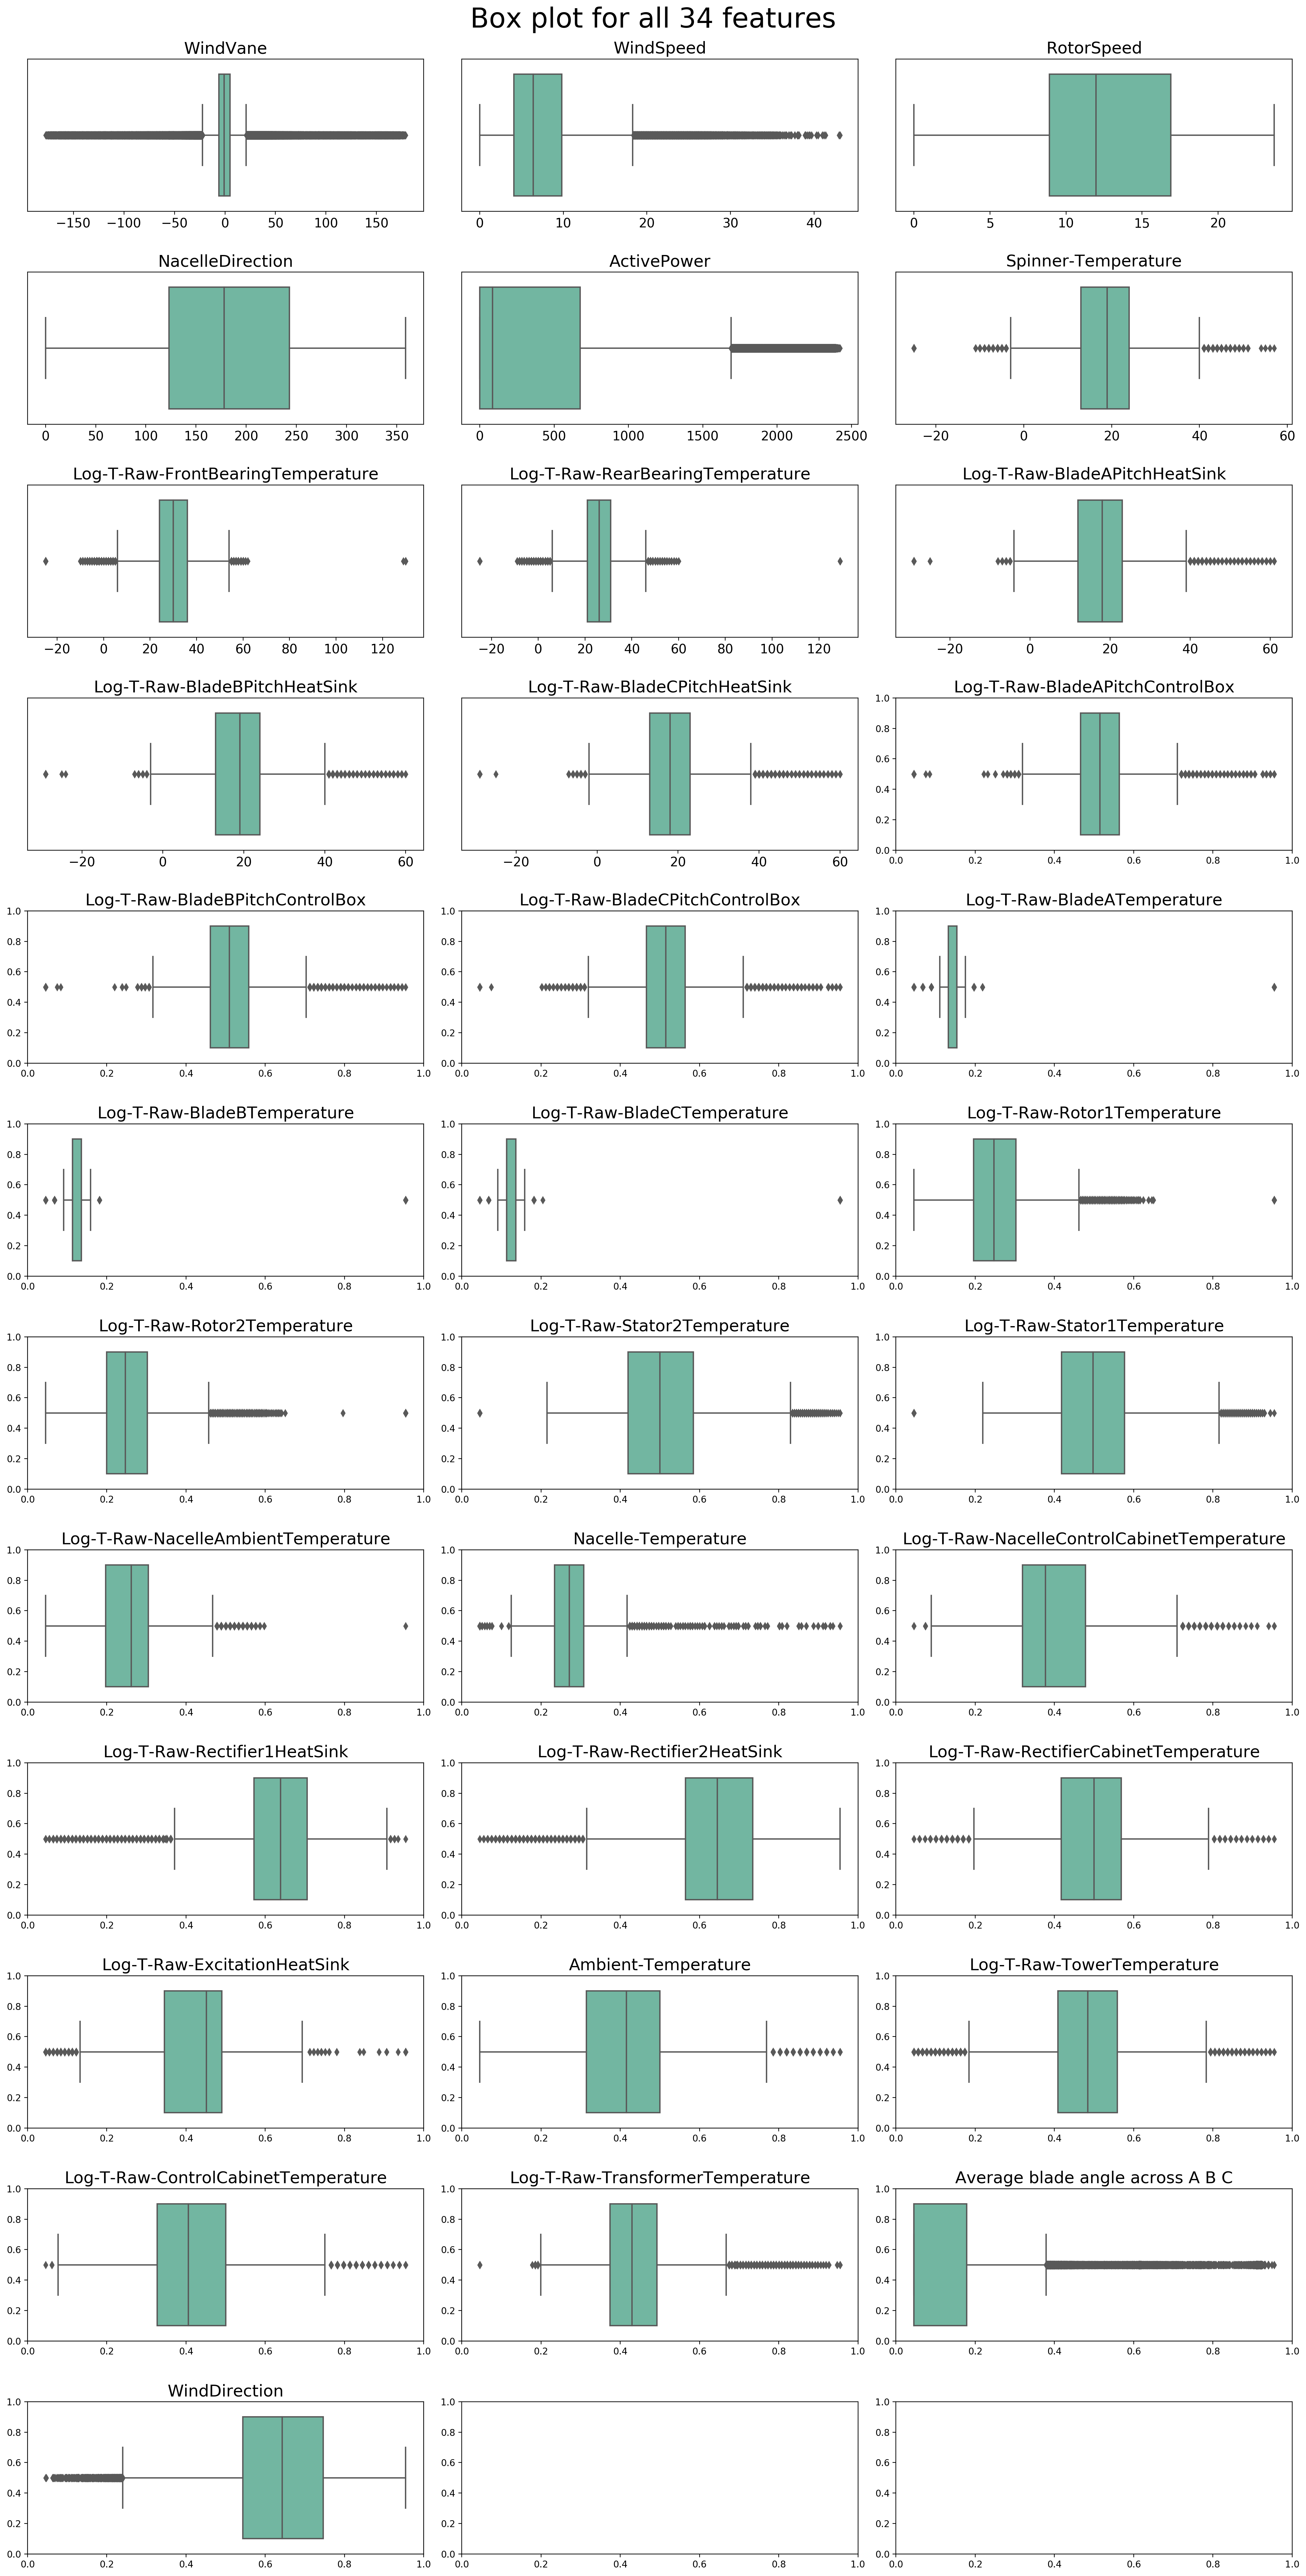

In [89]:
import matplotlib.pyplot as plt
import seaborn as sns
import time
start_time = time.time()
print("plotting...")
fig,axs = plt.subplots(12,3,figsize=(20,40),dpi=200)
fig.suptitle("Box plot for all 34 features",fontsize=30)
fig.tight_layout()
plt.subplots_adjust(top=0.96)

i=1
for column in undersampled_data:
    if (column == 'TimeStamp' or column == 'Status'):
        continue
    ax = fig.add_subplot(12,3,i)
    ax.set_title(column,fontsize=18)
    sns.boxplot(undersampled_data[column],palette="Set2")
    ax.set_xlabel('')
    
    # Removing y ticks and y labels
    frame1 = plt.gca()
    frame1.axes.yaxis.set_ticklabels([])
    frame1.axes.get_yaxis().set_ticks([])
    
    for tick in ax.xaxis.get_major_ticks():
                tick.label.set_fontsize(14) 
                # specify integer or one of preset strings, e.g.
                #tick.label.set_fontsize('x-small') 
    
    if(i >=12):
        frame1.axes.xaxis.set_ticklabels([])
        frame1.axes.get_xaxis().set_ticks([])
        frame1.axes.yaxis.set_ticklabels([])
        frame1.axes.get_xaxis().set_ticks([])
        frame1.axes.yaxis.set_ticklabels([])
    
    i+=1
    
for j in range(0,(len(axs)-1)):
    fig.delaxes(axs.flatten()[j])

fig.subplots_adjust(hspace=0.4)
print("--- %s seconds ---" % (time.time() - start_time))